# Quantum teleportation

This notebook demonstrates the Quantum Teleportation protocol from Chapter 10, Key Applications of Entanglement.

## 0. Setup

The cells below install the packages and import the libraries needed by this demo.

In [ ]:
#@title Install Qiskit and other dependencies
%pip install qiskit qiskit-aer qiskit-ibm-runtime pylatexenc

In [1]:
# Imports

from math import cos, sin, pi as π
# from ipywidgets import interact
from IPython.display import display, Markdown
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.circuit import AncillaRegister, ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector

## 1. Circuit Definition

The following cell defines the Quantum Teleportation circuit.

This circuit is inverted from the one in the book, because Qiskit treats the top wire as the least significant bit (rightmost in big-endian), while the book treats the top wire as the most significant bit (leftmost in big-endian).
The circuit is inverted so that the statevector output matches the book.

Refer to **2. Interaction** for configurable options (parameters).

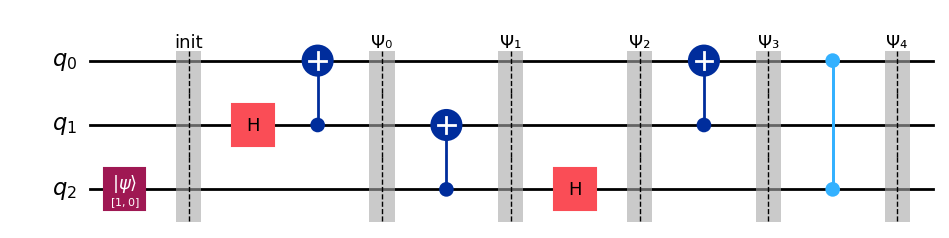

In [2]:
def create_state(θ, φ):
    α = cos(θ/2)
    β = sin(θ/2) * (cos(φ) + 1j * sin(φ)) # exp(iφ) sin(θ/2)
    return Statevector([α, β])


def create_circuit(initial_state, save_statevector = True):
    q = [q0, q1, q2] = QuantumRegister(3, 'q')
    # c = [c0] = ClassicalRegister(1, 'c')
    circuit = QuantumCircuit(q)
    circuit.initialize(initial_state, q2)
    if save_statevector:
        circuit.save_statevector(label = "init")
    circuit.h(q1)
    circuit.cx(q1, q0)
    if save_statevector:
        circuit.save_statevector(label = "Ψ₀")
    circuit.cx(q2, q1)
    if save_statevector:
        circuit.save_statevector(label = "Ψ₁")
    circuit.h(q2)
    if save_statevector:
        circuit.save_statevector(label = "Ψ₂")
    # circuit.measure(q2, c0)
    # circuit.x(q0).c_if(c0, 1)
    circuit.cx(q1, q0)
    if save_statevector:
        circuit.save_statevector(label = "Ψ₃")
    # circuit.measure(q1, c1)
    # circuit.z(q0).c_if(c1, 1)
    circuit.cz(q2, q0)
    if save_statevector:
        circuit.save_statevector(label = "Ψ₄")
    # circuit.measure([q2, q1], [c0, c1])
    return circuit


circuit = create_circuit(create_state(0, 0))
display(circuit.draw('mpl'))


def statevector_to_latex(statevector):
    return statevector.draw('latex_source').replace('|', r'\|') # escape | for use in Markdown table

## 2. Interaction

The cell below runs the quantum teleportation circuit defined in **1. Circuit Definition**, and shows the state vector resulting at each stage of the computation.

You can experiment with $\theta$ and $\phi$ to create a general state
$$
|\psi\rangle = \cos\frac{\theta}{2}|0\rangle + e^{i\phi}\sin\frac{\theta}{2}|1\rangle
$$
and observe the teleportation of the state.

Some examples are:

| State | $\theta$ | $\phi$ |
|-------|----------|--------|
| $\|0\rangle$ | 0 | 0 |
| $\|1\rangle$ | $\pi$ | 0 |
| $\frac{1}{\sqrt{2}}(\|0\rangle + i\|1\rangle)$ | $\frac{\pi}{2}$ | $\frac{\pi}{2}$ |

In [6]:
# Basis state |0⟩
# θ = 0
# φ = 0

# Basis state |1⟩
# θ = π
# φ = 0

# Another state: 1/√2 (|0⟩ + i|1⟩)
θ = π/2
φ = π/2

circuit = create_circuit(create_state(θ, φ))
simulator = AerSimulator()
result = simulator.run(circuit).result()
data = result.data(0)
init = statevector_to_latex(data["init"])
Ψ0 = statevector_to_latex(data["Ψ₀"])
Ψ1 = statevector_to_latex(data["Ψ₁"])
Ψ2 = statevector_to_latex(data["Ψ₂"])
Ψ3 = statevector_to_latex(data["Ψ₃"])
Ψ4 = statevector_to_latex(data["Ψ₄"])

state_table = f"""Stage | State
--- | ---
init | ${init}$
Ψ₀ | ${Ψ0}$
Ψ₁ | ${Ψ1}$
Ψ₂ | ${Ψ2}$
Ψ₃ | ${Ψ3}$
Ψ₄ | ${Ψ4}$
"""
display(Markdown(state_table))

Stage | State
--- | ---
init | $\frac{\sqrt{2}}{2} \|000\rangle+\frac{\sqrt{2} i}{2} \|100\rangle$
Ψ₀ | $\frac{1}{2} \|000\rangle+\frac{1}{2} \|011\rangle+\frac{i}{2} \|100\rangle+\frac{i}{2} \|111\rangle$
Ψ₁ | $\frac{1}{2} \|000\rangle+\frac{1}{2} \|011\rangle+\frac{i}{2} \|101\rangle+\frac{i}{2} \|110\rangle$
Ψ₂ | $\frac{\sqrt{2}}{4} \|000\rangle+\frac{\sqrt{2} i}{4} \|001\rangle+\frac{\sqrt{2} i}{4} \|010\rangle+\frac{\sqrt{2}}{4} \|011\rangle+\frac{\sqrt{2}}{4} \|100\rangle- \frac{\sqrt{2} i}{4} \|101\rangle- \frac{\sqrt{2} i}{4} \|110\rangle+\frac{\sqrt{2}}{4} \|111\rangle$
Ψ₃ | $\frac{\sqrt{2}}{4} \|000\rangle+\frac{\sqrt{2} i}{4} \|001\rangle+\frac{\sqrt{2}}{4} \|010\rangle+\frac{\sqrt{2} i}{4} \|011\rangle+\frac{\sqrt{2}}{4} \|100\rangle- \frac{\sqrt{2} i}{4} \|101\rangle+\frac{\sqrt{2}}{4} \|110\rangle- \frac{\sqrt{2} i}{4} \|111\rangle$
Ψ₄ | $\frac{\sqrt{2}}{4} \|000\rangle+\frac{\sqrt{2} i}{4} \|001\rangle+\frac{\sqrt{2}}{4} \|010\rangle+\frac{\sqrt{2} i}{4} \|011\rangle+\frac{\sqrt{2}}{4} \|100\rangle+\frac{\sqrt{2} i}{4} \|101\rangle+\frac{\sqrt{2}}{4} \|110\rangle+\frac{\sqrt{2} i}{4} \|111\rangle$


## 3. Verification

The state vector result shown above is a little hard to interpret, because Qiskit does not separate the factors of the resulting product state.

We can verify the result state by comparing it with the expected state.

The cell below uses the [Swap test](https://en.wikipedia.org/wiki/Swap_test) to do this. A fidelity of 1 indicates that the state is the same as the expected state.

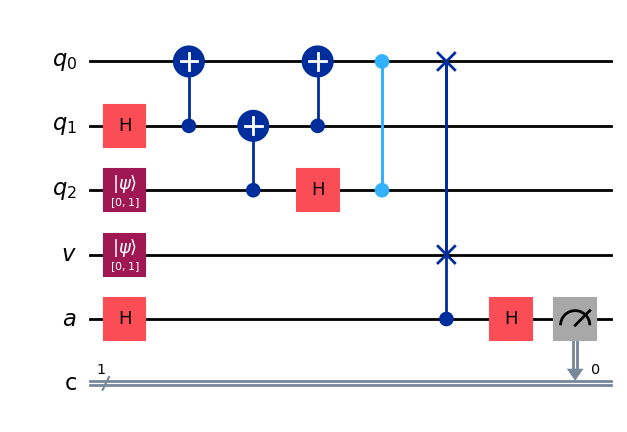

Fidelity: 1.0


In [9]:
# start with original teleportation circuit, minus the statevector captures
verification_circuit = create_circuit(create_state(θ, φ), save_statevector=False)

# add additional registers for swap test
q0 = verification_circuit.qubits[0]
c = [c0] = ClassicalRegister(1, 'c')
v = [v0] = QuantumRegister(1, 'v')
a = [a0] = AncillaRegister(1, 'a')
verification_circuit.add_register(c)
verification_circuit.add_register(v)
verification_circuit.add_register(a)
verification_circuit.initialize(create_state(θ, φ), v0)

# verify result state in q2 using swap test
verification_circuit.h(a0)
verification_circuit.cswap(a0, q0, v0)
verification_circuit.h(a0)
verification_circuit.measure(a0, c0)
display(verification_circuit.draw('mpl'))

# run circuit and compute fidelity
backend = AerSimulator()
sampler = Sampler(backend)
shots = 1000
job = sampler.run([verification_circuit], shots=shots)
result = job.result()
counts = result[0].data.c.get_counts()
fidelity = counts['0'] / shots

print(f"Fidelity: {fidelity}")
